 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import ( accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Iris.csv")
print(df.head())

Saving Iris.csv to Iris (1).csv
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
df.drop("Id", axis=1, inplace=True)

Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(df["Species"].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
df.shape

(150, 5)

Preprocessing

In [ ]:
X = df.drop("Species", axis=1)
y = df["Species"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Model Training
1. KNN
2. Random Forest
3. SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)

    # Train on train set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n {name} Model Results")
    print("Cross-validation Accuracy: %.2f (+/- %.2f)" % (cv_scores.mean(), cv_scores.std()))
    print("Test Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))



 KNN Model Results
Cross-validation Accuracy: 0.97 (+/- 0.02)
Test Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


 Random Forest Model Results
Cross-validation Accuracy: 0.97 (+/- 0.02)
Test Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      

Confusion Matrix Heatmap

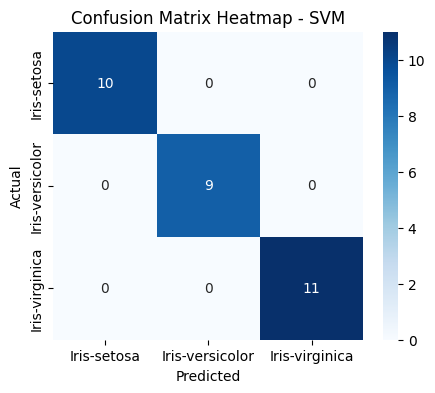

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(f"Confusion Matrix Heatmap - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Correlation heatmap

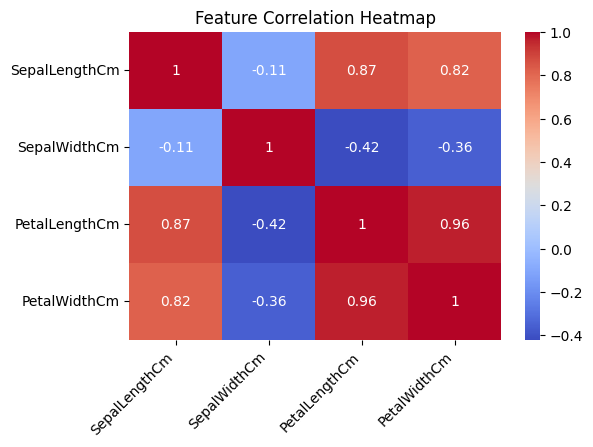

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop("Species", axis=1).corr(), annot=True, cmap= "coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Feature Correlation Heatmap")
plt.show()